In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as df
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
data = pd.read_csv("../data/g4.areaAvgTimeSeries.AIRX3STM_006_CH4_VMR_A.500hPa.20020901-20231130.180W_0S_180E_90N.csv", skiprows=9,  usecols=[0,1], names=['Time','Mean AIRS Methane'])

# Read the times as dates and the methane concentrations as numeric values
data['Time'] = pd.to_datetime(data['Time'])
data['Mean AIRS Methane'] = pd.to_numeric(data['Mean AIRS Methane'])

# Restrict the range and calculate the month-to-month growth rates
dateRange = (data['Time'] >= '2003-1-1') & (data['Time'] <= '2016-7-1') 
calcRange = (data['Time'] >= '2002-12-1') & (data['Time'] <= '2016-7-1')
range1data= data.loc[calcRange]
valuesRange1 = range1data['Mean AIRS Methane'].values
subtractedMonthly = [x-y for x, y in zip(valuesRange1[1:], valuesRange1)]   
data = data.loc[dateRange]

data['Mean AIRS Methane'] = subtractedMonthly

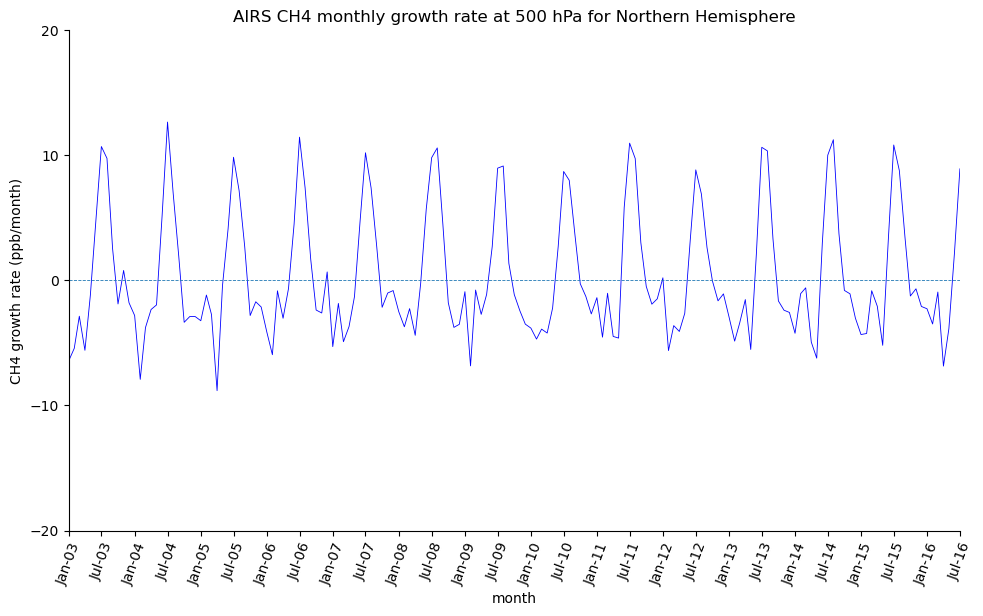

In [3]:
ttl = "AIRS CH4 monthly growth rate at 500 hPa for Northern Hemisphere"

# Format the dates and change the image size
datefmt = df.DateFormatter("%b-%y")
fig, ax = plt.subplots()
fig.set_size_inches(11.5, 6.5)

# Plot the dates and calculated CH4 growth rates
ax.plot(data['Time'].values, data['Mean AIRS Methane'].values,linewidth=0.6,color='blue')
ax.xaxis.set_major_formatter(datefmt)

# Add axes labels and graph title
ax.set(xlabel="month", ylabel="CH4 growth rate (ppb/month)")
ax.set(title=ttl)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add center line and format x and y axis ticks
plt.hlines(0,'2003-1-1', '2016-7-1', linestyle='dashed', linewidth=0.6)
plt.ylim(-20, 20)
plt.xlim('2003-1-1', '2016-7-1')
plt.xticks(['2003-1-1', '2016-7-1'],rotation=70)
plt.yticks([-20, -10, 0, 10, 20])
ax.xaxis.set_major_locator(df.MonthLocator(interval=6))

figure1 = plt.figure(1)

In [4]:
figure1.savefig('AIRS_CH4_mon_500hpa.png', format='png', dpi=360)